http://ned.ipac.caltech.edu/level5/March19/Baron/Baron2.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # statistical data visualization

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [2]:
# Using this to be able to plot spectra. For some reason Jupyter won't let me plot spectra without this
%matplotlib inline

## Create our own labels:
    - Random empty spot as noise
    
## Use entire spectrum and not encoded.

* Extracted entire noise spectrum. 

* Combine the high confidence and noise array. Here are the labels for it. 

### Ultimately, we want the ML algorithm to be able to pick out high-z sources from noise!

In [3]:
# loading in the decoded sources I got from inputting random encoded sources into t-sne.
# These will be our testing sample
random_highz_sources = np.load("highz_sources.npy")

In [4]:
# loading in my high confidence high z sources.
high_confidence_highz_spectra = np.load("high_confidence_highz_1000.npy", allow_pickle = True)

In [5]:
# loading in the noise sample.
noise_sample = np.load("noise_sample_1000.npy", allow_pickle = True)

In [35]:
noise_sample

array([[-0.27453507, -0.27376958, -0.27300397, ...,  0.05124273,
         0.05123827,  0.05123386],
       [ 0.107195  ,  0.10851217,  0.10982789, ...,  0.14232644,
         0.14230387,  0.14228151],
       [-0.06730778, -0.06700857, -0.06670939, ..., -0.06052472,
        -0.06053803, -0.06055122],
       ...,
       [-0.55389851, -0.55327332, -0.5526465 , ...,  0.04016945,
         0.04015587,  0.04014242],
       [ 0.19034464,  0.18940234,  0.18845793, ...,  0.48314523,
         0.48315916,  0.48317293],
       [ 1.20482559,  1.20504015,  1.2052516 , ...,  0.24669444,
         0.2467046 ,  0.24671464]])

In [6]:
df = pd.DataFrame(columns=[1, 2])
#df[1] = df[1].astype(object)
for i in range(1000):
    df.loc[i, 1] = noise_sample[i]
    df.loc[i, 2] = high_confidence_highz_spectra[i]
df

,1,2
0,"[-0.2745350651090622, -0.2737695754367118, -0....","[0.41081295627938086, 0.41056771447626034, 0.4..."
1,"[0.10719499983231176, 0.10851217425876615, 0.1...","[1.2038720574260438, 1.2035965089283491, 1.203..."
2,"[-0.06730778183374654, -0.06700857341262742, -...","[-0.3846966864195164, -0.383299771206096, -0.3..."
3,"[0.26524069710086234, 0.2641567780718815, 0.26...","[0.30983761383520153, 0.3103446243530814, 0.31..."
4,"[0.22173403554036744, 0.22058522042018333, 0.2...","[0.9560510273906166, 0.9591930732620303, 0.962..."
...,...,...
995,"[-0.9745579263840072, -0.9743290107782245, -0....","[0.03439495327132092, 0.03404298865517989, 0.0..."
996,"[0.651170647027954, 0.6509386707244421, 0.6507...","[0.026277668678197825, 0.02663091187239326, 0...."
997,"[-0.5538985072952052, -0.5532733222073725, -0....","[-0.3130105874134315, -0.31306856269327893, -0..."
998,"[0.19034463588101694, 0.1894023417498457, 0.18...","[1.001519775442492, 1.001469975314998, 1.00141..."


In [7]:
df.columns = ["noise", "confident-highz"]

In [8]:
df['confident-highz']

0      [0.41081295627938086, 0.41056771447626034, 0.4...
1      [1.2038720574260438, 1.2035965089283491, 1.203...
2      [-0.3846966864195164, -0.383299771206096, -0.3...
3      [0.30983761383520153, 0.3103446243530814, 0.31...
4      [0.9560510273906166, 0.9591930732620303, 0.962...
                             ...                        
995    [0.03439495327132092, 0.03404298865517989, 0.0...
996    [0.026277668678197825, 0.02663091187239326, 0....
997    [-0.3130105874134315, -0.31306856269327893, -0...
998    [1.001519775442492, 1.001469975314998, 1.00141...
999    [-0.17162231379271262, -0.1709112045033402, -0...
Name: confident-highz, Length: 1000, dtype: object

## Random-Forest classification

https://levelup.gitconnected.com/random-forest-regression-209c0f354c84#:~:text=Random%20Forest%20Regression%20is%20a%20supervised%20learning%20algorithm%20that%20uses,prediction%20than%20a%20single%20model.

https://www.datacamp.com/tutorial/random-forests-classifier-python

## According to internet, issues with overfitting! Possibly need more data.

https://stackoverflow.com/questions/62445343/randomforestregressor-in-sklearn-giving-negative-scores

In [9]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer

In [10]:
X = df['noise']

In [11]:
y= df['confident-highz']

In [55]:
twodspectra = np.concatenate((high_confidence_highz_spectra, noise_sample))

In [43]:
high_confidence_highz_spectra[0]

array([0.41081296, 0.41056771, 0.41032136, ..., 0.41890103, 0.41887913,
       0.41885743])

In [45]:
noise_sample[0]

array([-0.27453507, -0.27376958, -0.27300397, ...,  0.05124273,
        0.05123827,  0.05123386])

In [44]:
twodspectratest[1000]

array([-0.27453507, -0.27376958, -0.27300397, ...,  0.05124273,
        0.05123827,  0.05123386])

In [49]:
highz_classification = np.ones(1000)
noise_classification = np.zeros(1000)

merge_classification = np.append(highz_classification, noise_classification)

In [51]:
merge_classification[0]

1.0

In [54]:
merge_classification[1000]

0.0

### Make my own labels:
https://towardsdatascience.com/labeling-data-with-pandas-9e573ce59c42

In [56]:
X = twodspectra
y = merge_classification

In [57]:
# Splitting arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [58]:

# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

In [59]:

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  

In [60]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [62]:
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.6683333333333333


In [98]:
clf.predict(X_test[0].reshape(1, -1))

array([0.])

In [99]:
clf.predict(X_test[1].reshape(1, -1))

array([1.])

In [100]:
y_test[0]

1.0

In [101]:
y_test[1]

0.0

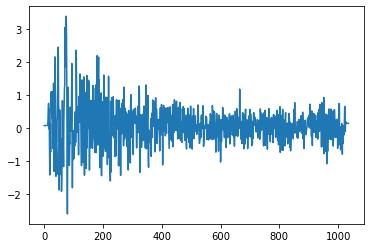

In [102]:
plt.plot(X_test[0])

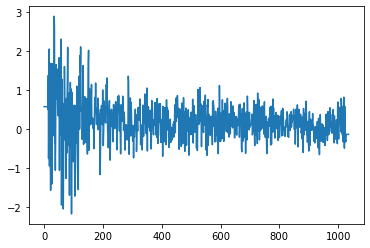

In [104]:
plt.plot(X_test[1])

Idk how much this would help but i recall that certain algorithms do better when the data is normalized. Maybe we can try implementing that and see how it does.
I think sklearn has some standard scaler that normalizes the data in a way to be used for ML purposes
white_check_mark
eyes
raised_hands





11:14
We can also look into the documentations and see what parameters we think has a big impact on the classification
11:15
and tweak those one at a time to see which has the biggest impact